In [2]:
install.packages('igraph')
install.packages('Matrix')
install.packages('pracma')

package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Wenyi\AppData\Local\Temp\RtmpWwagSB\downloaded_packages
package 'Matrix' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Wenyi\AppData\Local\Temp\RtmpWwagSB\downloaded_packages
package 'pracma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Wenyi\AppData\Local\Temp\RtmpWwagSB\downloaded_packages


In [3]:
library('igraph')
library('Matrix')
library('pracma')

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'Matrix' was built under R version 3.6.3"Warning message:
"package 'pracma' was built under R version 3.6.3"
Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



# Part1 Generating Random Networks

## Part1_1 Create random networks using Erd¨os-R´enyi (ER) model

### 1_1_a

[1] "practical  : n=1000, ps= 0.003  --- mean is : 2.956 , variance is : 2.79085485485485"
[1] "theoretical: n=1000, ps= 0.003  --- mean is : 2.997 , variance is : 2.988009"
[1] "practical  : n=1000, ps= 0.004  --- mean is : 3.986 , variance is : 4.05385785785786"
[1] "theoretical: n=1000, ps= 0.004  --- mean is : 3.996 , variance is : 3.980016"
[1] "practical  : n=1000, ps= 0.01  --- mean is : 10.154 , variance is : 10.0763603603604"
[1] "theoretical: n=1000, ps= 0.01  --- mean is : 9.99 , variance is : 9.8901"
[1] "practical  : n=1000, ps= 0.05  --- mean is : 50.336 , variance is : 47.4485525525526"
[1] "theoretical: n=1000, ps= 0.05  --- mean is : 49.95 , variance is : 47.4525"
[1] "practical  : n=1000, ps= 0.1  --- mean is : 99.97 , variance is : 84.5656656656657"
[1] "theoretical: n=1000, ps= 0.1  --- mean is : 99.9 , variance is : 89.91"


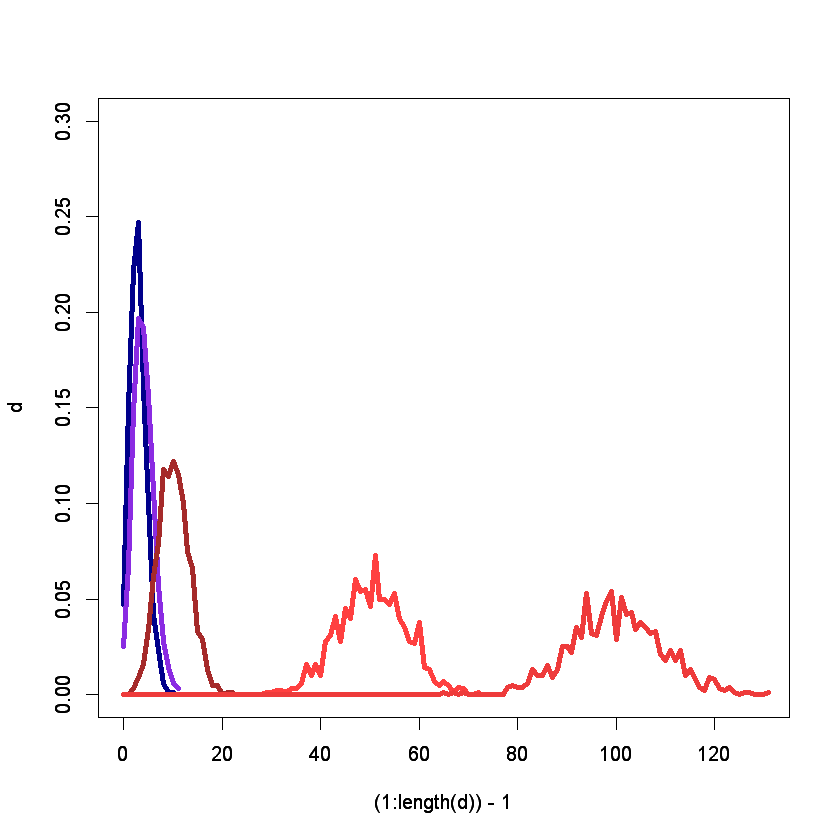

In [47]:
ps <- c(0.003, 0.004, 0.01, 0.05, 0.1)
gs <- list()
for(i in 1:length(ps)){
    g <- sample_gnp(n=1000, p=ps[i], directed = FALSE, loops = FALSE)
    e <- mean(degree(g))
    v <- var(degree(g))
    print(paste('practical  : n=1000, ps=',ps[i], ' --- mean is :', e, ', variance is :', v))
    print(paste('theoretical: n=1000, ps=',ps[i], ' --- mean is :', 999*ps[i], ', variance is :', 999*ps[i]*(1-ps[i])))
    d <- degree_distribution(g)
    plot((1:length(d))-1, d, type='l',xlim=c(0,130), ylim=range(0,0.3), col=colors()[i+29],lwd = 4)
    par(new = TRUE)
    gs[[i]] <- g
}


### 1_1_b

In [228]:
for(i in 1:length(ps)){
    print(paste('n=1000, ps=', ps[i], 
                ', connections: ', is_connected(gs[[i]]), 
                ', GCC size:', max(components(gs[[i]])$csize),
                ', diameter: ', diameter(gs[[i]])))
}

[1] "n=1000, ps= 0.003 , connections:  FALSE , GCC size: 944 , diameter:  14"
[1] "n=1000, ps= 0.004 , connections:  FALSE , GCC size: 972 , diameter:  11"
[1] "n=1000, ps= 0.01 , connections:  TRUE , GCC size: 1000 , diameter:  6"
[1] "n=1000, ps= 0.05 , connections:  TRUE , GCC size: 1000 , diameter:  3"
[1] "n=1000, ps= 0.1 , connections:  TRUE , GCC size: 1000 , diameter:  3"


In [5]:
ps <- c(0.003, 0.004, 0.01, 0.05, 0.1)
n_c <- ps*0
for(i in 1:length(ps)){
    for(j in 1:2000){
        g <- sample_gnp(n=1000, p=ps[i], directed = FALSE, loops = FALSE)
        n_c[i] <-  n_c[i] + is_connected(g)
    }
}
n_c/2000

[1] 0.000 0.000 0.959 1.000 1.000

### 1_1_c

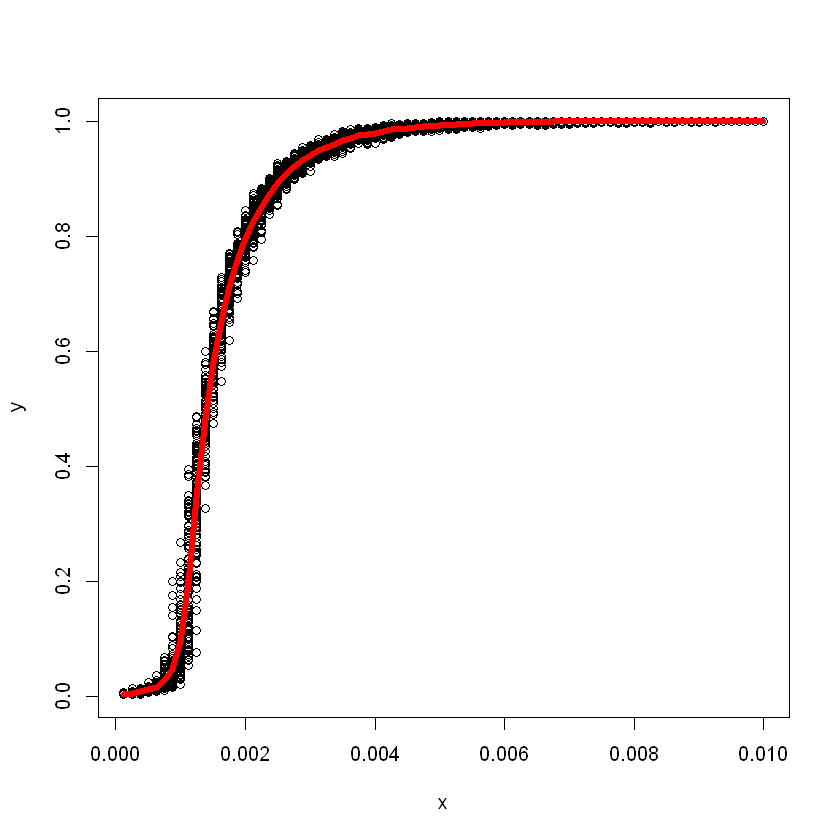

In [15]:
n <- 80
ps <- (1:n)/n/100
gccs <- ps*0
x <- zeros(1, n*100)
y <- zeros(1, n*100)

for(i in 1:n){
    tmp_gcc = zeros(1,100)
    for(j in 1:100){
        g <- sample_gnp(n=1000, p=ps[i], directed = FALSE, loops = FALSE)
        tmp_gcc[j] <- max(components(g)$csize)
    }
    gccs[i] <- mean(tmp_gcc)/1000
    x[(i*100-99):(i*100)] <- ps[i]
    y[(i*100-99):(i*100)] <- tmp_gcc/1000
}
plot(x, y)
lines(ps, gccs, col='red',lwd = 5)

In [5]:
ps[gccs>0.1][1]

[1] 0.001023293

In [12]:
ps[gccs>0.99][1]

[1] 0.004786301

### 1_1_d

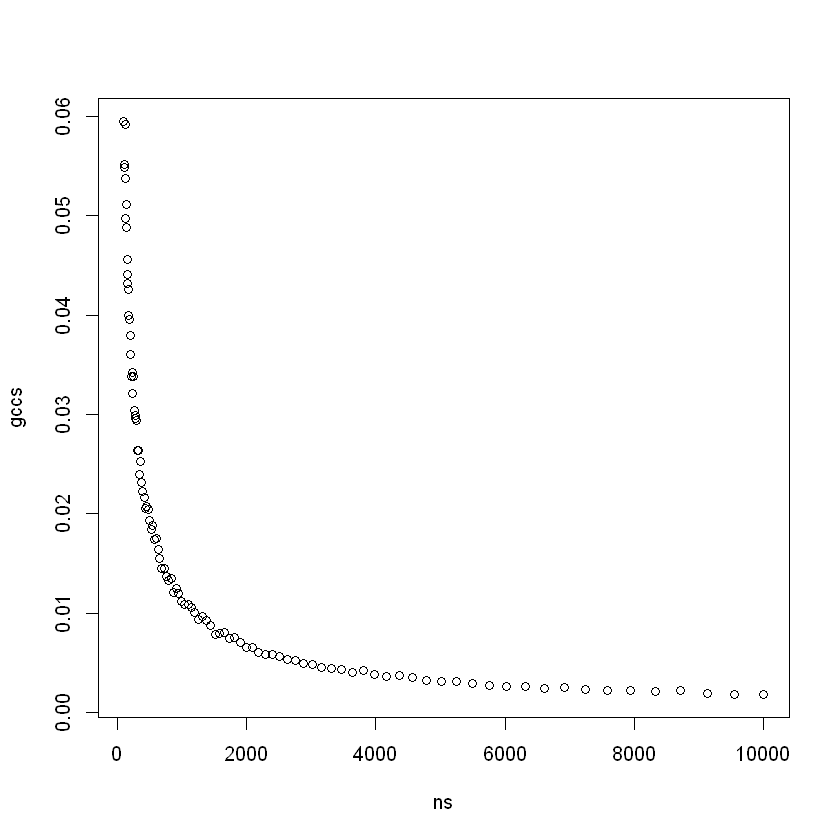

In [155]:
c <- 0.5
ns <- 10^(2+(1:100)/50)
gccs <- ns*0
for(i in 1:100){
    pp <- c/ns[i]
    tmp_gcc = zeros(1,100)
    for(j in 1:100){
        g <- sample_gnp(n=ns[i], p=pp, directed = FALSE, loops = FALSE)
        tmp_gcc[j] <- max(components(g)$csize)/ns[i]
    }
    gccs[i] <- mean(tmp_gcc)
}
plot(ns, gccs)

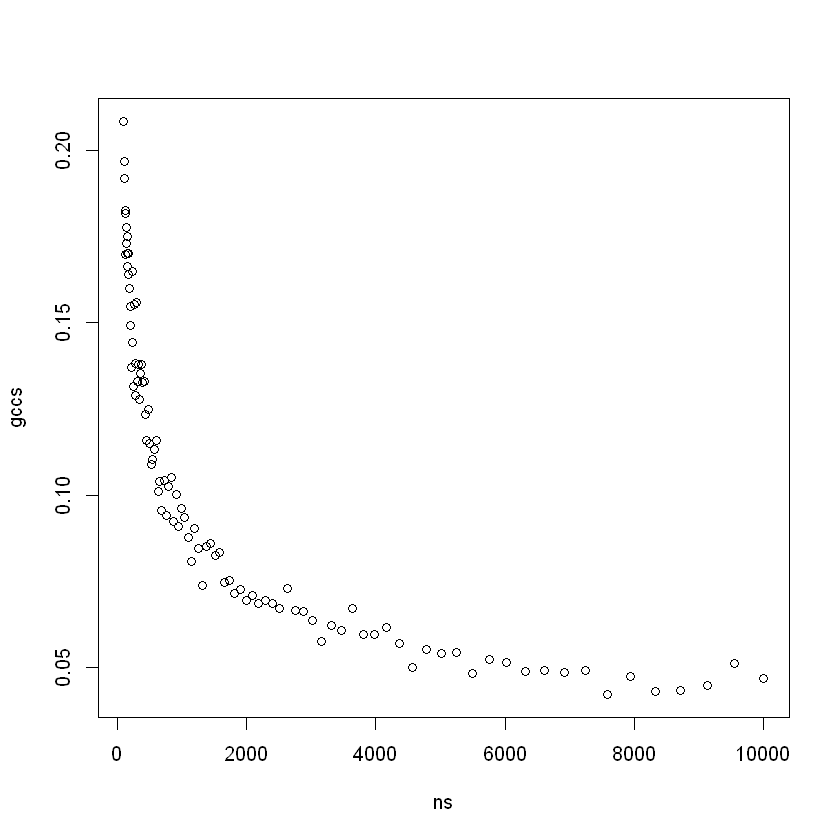

In [160]:
c <- 1
ns <- 10^(2+(1:100)/50)
gccs <- ns*0
for(i in 1:100){
    pp <- c/ns[i]
    tmp_gcc = zeros(1,100)
    for(j in 1:100){
        g <- sample_gnp(n=ns[i], p=pp, directed = FALSE, loops = FALSE)
        tmp_gcc[j] <- max(components(g)$csize)/ns[i]
    }
    gccs[i] <- mean(tmp_gcc)
}
plot(ns, gccs)

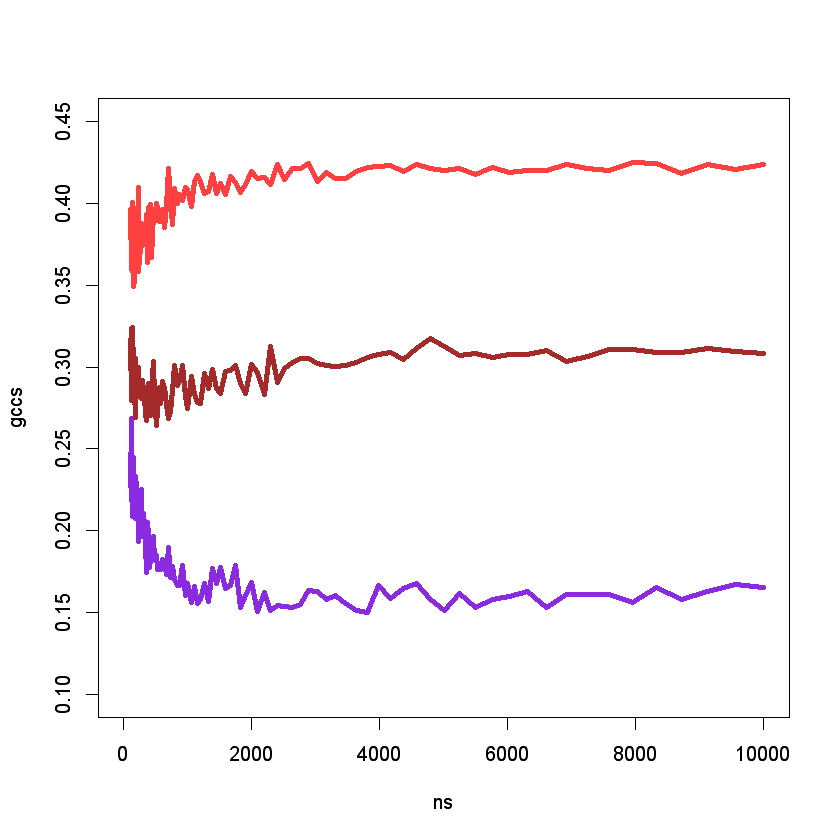

In [157]:
cs <- c(1.1,1.2,1.3)
for(k in 1:3){
    ns <- 10^(2+(1:100)/50)
    gccs <- ns*0
    for(i in 1:100){
        pp <- cs[k]/ns[i]
        tmp_gcc = zeros(1,100)
        for(j in 1:100){
            g <- sample_gnp(n=ns[i], p=pp, directed = FALSE, loops = FALSE)
            tmp_gcc[j] <- max(components(g)$csize)/ns[i]
        }
        gccs[i] <- mean(tmp_gcc)
    }
    plot(ns, gccs, type='l',xlim=c(0,10000), ylim=range(0.1,0.45), col=colors()[k+30],lwd = 4)
    par(new = TRUE)
}

## Part1_2 Create networks using preferential attachment model

### 1_2_a

In [4]:
tmp_conc = zeros(1,100)
for(i in 1:100){
    g<-sample_pa(n=1000,m=1,directed=F)
    tmp_conc[i] <- is_connected(g)
}
mean(tmp_conc)

[1] 1

### 1_2_b

In [16]:
g1 <- sample_pa(n=1000,m=1,directed=F)
sizes(cluster_fast_greedy(g1))

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
56 45 55 44 49 49 42 48 36 40 36 35 32 31 34 29 29 30 29 24 26 24 22 21 21 19 
27 28 29 30 31 32 
21 16 17 13 14 13 

In [17]:
modularity(g1, cluster_fast_greedy(g1)$membership)

[1] 0.9325096

### 1_2_c

In [18]:
tmp_conc = zeros(1,100)
for(i in 1:100){
    g<-sample_pa(n=10000,m=1,directed=F)
    tmp_conc[i] <- is_connected(g)
}
mean(tmp_conc)

[1] 1

In [24]:
g2 <- sample_pa(n=10000,m=1,directed=F)
modularity(g2, cluster_fast_greedy(g2)$membership)

[1] 0.9780569

### 1_2_d

 [1] 0.000 0.603 0.205 0.081 0.039 0.021 0.015 0.008 0.008 0.003 0.006 0.005
[13] 0.000 0.001 0.000 0.001 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.001
[25] 0.000 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.001


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"17 y values <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"45 y values <= 0 omitted from logarithmic plot"

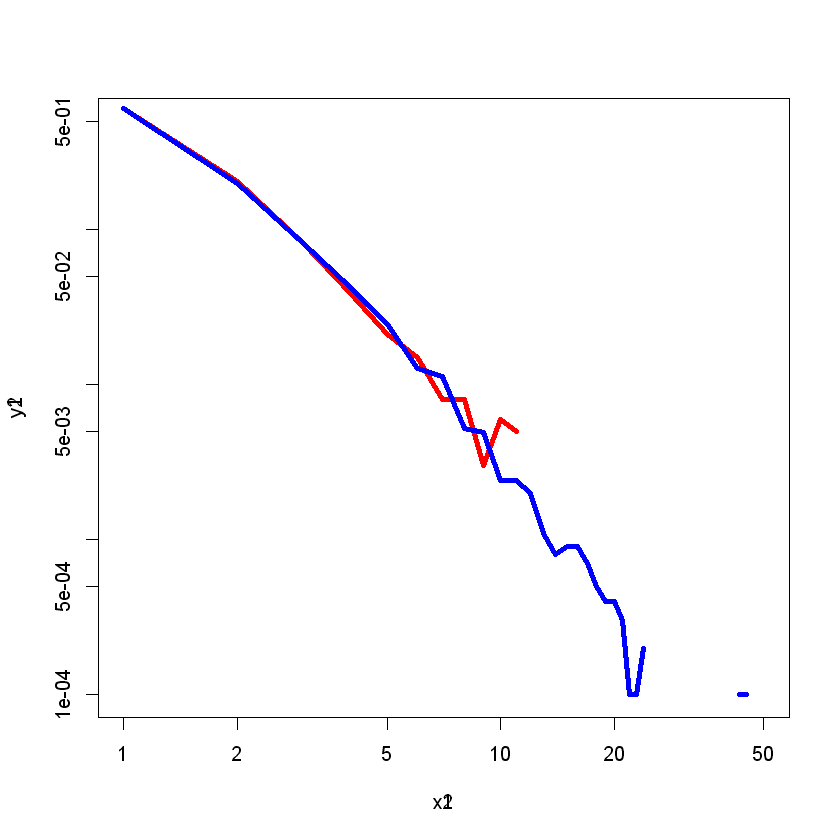

In [25]:
y1 = degree_distribution(g1)
x1 = (1:length(y1))-1
y2 = degree_distribution(g2)
x2 = (1:length(y2))-1
print(y1)
plot(x1,y1,log = 'xy', type='l', xlim=c(1,50), ylim=c(0.0001, 0.5), col='red',lwd = 4)
par(new = TRUE)
plot(x2,y2,log = 'xy', type='l', xlim=c(1,50), ylim=c(0.0001, 0.5), col='blue',lwd = 4)

In [26]:
x = log10(x1[y1>0])
y = log10(y1[y1>0])
lm(y~x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
    -0.2417      -2.0541  


In [26]:
x = log10(x2[y2>0])
y = log10(y2[y2>0])
lm(y~x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
   -0.06849     -2.49405  


### 1_2_e


Call:
lm(formula = b ~ a)

Coefficients:
(Intercept)            a  
     -0.272       -1.152  



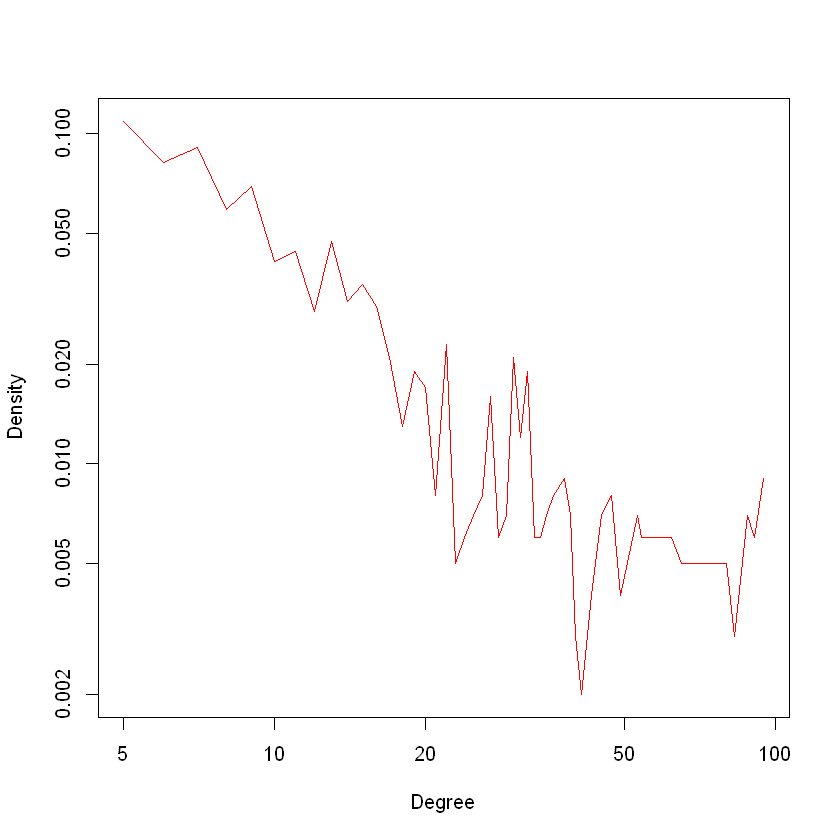

In [41]:
#for model n= 1000
n=1000
n_degree1 <- list()
for(i in 1:n){
    node_i = sample(n,1)
    nb_node_i = neighbors(g1,node_i)
    if (length(nb_node_i) == 1){
        node_j = nb_node_i
    }
    else{
        node_j = sample(nb_node_i,1)
    }
    n_degree1[[i]]<-degree(g1,node_j)
}

degt<-unlist(n_degree1)
dega<-table(degt)
deg<-dega/sum(dega)
y = as.numeric(deg)
x = names(deg)
plot(x,y,log = 'xy'，type='l',xlab='Degree',ylab = 'Density',col='red')
x = as.numeric(x)
a = log10(x)
b = log10(y)
print(lm(b~a))


Call:
lm(formula = b ~ a)

Coefficients:
(Intercept)            a  
    -0.3626      -1.2289  



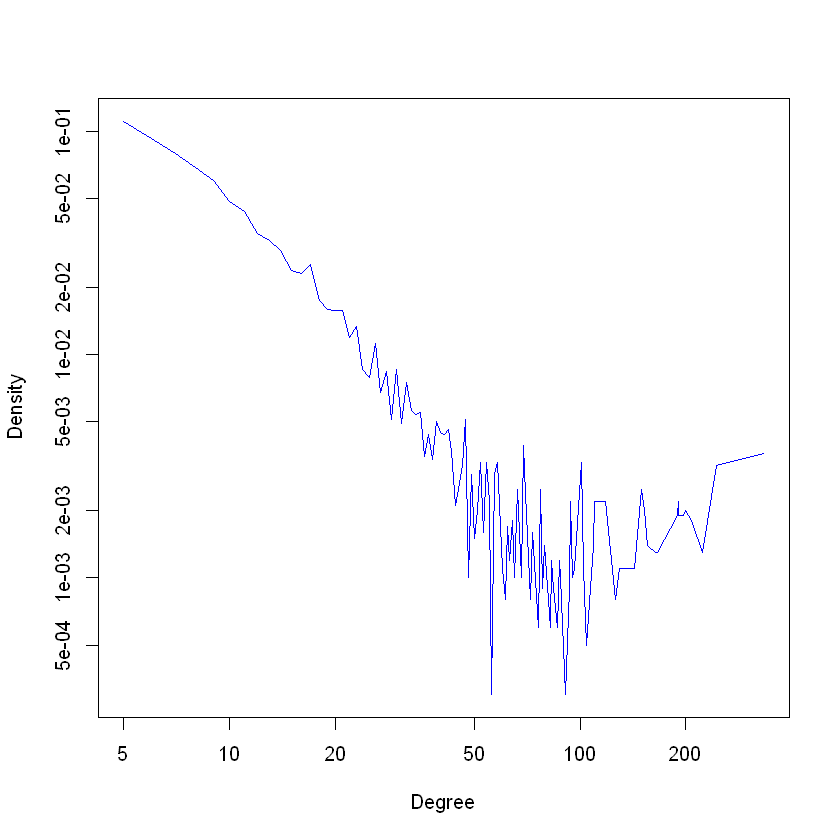

In [42]:
#for model n= 10000
n=10000
n_degree2 <- list()
for(i in 1:n){
    node_i = sample(n,1)
    nb_node_i = neighbors(g2,node_i)
    if (length(nb_node_i) == 1){
        node_j = nb_node_i
    }
    else{
        node_j = sample(nb_node_i,1)
    }
    n_degree2[[i]]<-degree(g2,node_j)
}
degt<-unlist(n_degree2)
dega<-table(degt)
deg<-dega/sum(dega)
y = as.numeric(deg)
x = names(deg)
plot(x,y,log = 'xy'，type='l',xlab='Degree',ylab = 'Density',col='blue')
x = as.numeric(x)
a = log10(x)
b = log10(y)
print(lm(b~a))

# 1_2_f

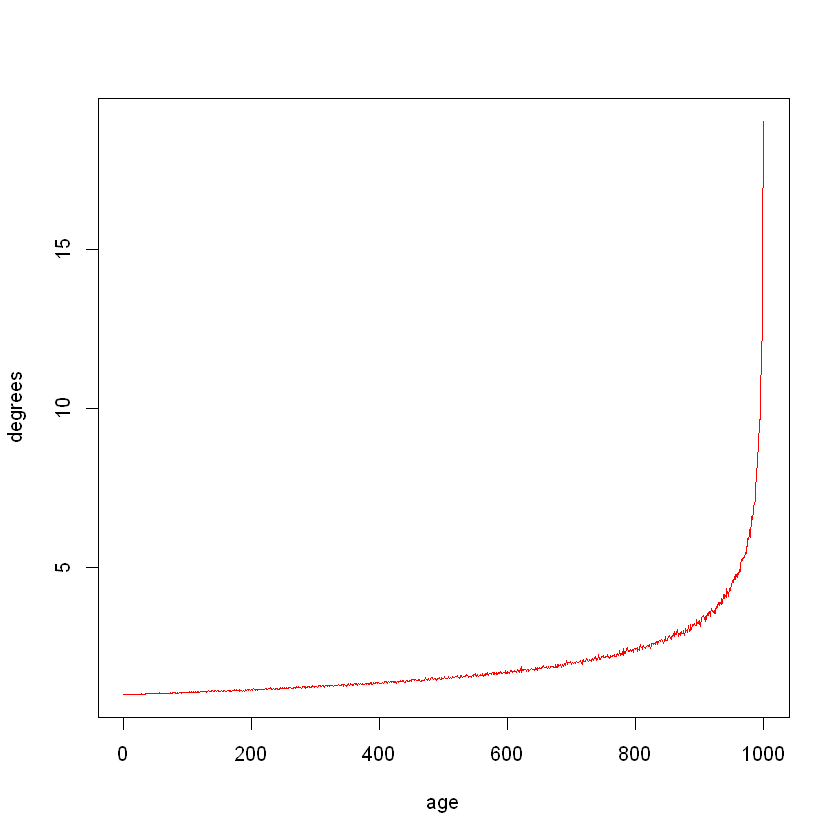

In [11]:
n = 1000
m = 1
degrees <- array(0,1000)
for(i in 1:n){
    g<-sample_pa(n=n,m=m,directed=F)
    degrees<-degrees+degree(g)
}
degrees<-degrees/n

plot(x=1:n,y=rev(degrees),type='l',xlab='age',ylab = 'degrees',col='red')
    

# 1_2_g

# M=2

In [12]:
m=2
tmp_conc = zeros(1,100)
for(i in 1:100){
    g<-sample_pa(n=1000,m=m,directed=F)
    tmp_conc[i] <- is_connected(g)
}
mean(tmp_conc)

[1] 1

In [13]:
g1 <- sample_pa(n=1000,m=m,directed=F)


In [14]:
tmp_conc = zeros(1,100)
for(i in 1:100){
    g<-sample_pa(n=1000,m=m,directed=F)
    tmp_conc[i] <- is_connected(g)
}
mean(tmp_conc)

[1] 1

In [15]:
g1 <- sample_pa(n=1000,m=m,directed=F)
modularity(g1, cluster_fast_greedy(g1)$membership)

[1] 0.5320558

In [16]:
tmp_conc = zeros(1,100)
for(i in 1:100){
    g<-sample_pa(n=10000,m=m,directed=F)
    tmp_conc[i] <- is_connected(g)
}
mean(tmp_conc)

[1] 1

In [17]:
g2 <- sample_pa(n=10000,m=m,directed=F)
modularity(g2, cluster_fast_greedy(g2)$membership)

[1] 0.5310952

 [1] 0.000 0.000 0.448 0.211 0.105 0.061 0.052 0.029 0.017 0.017 0.014 0.003
[13] 0.007 0.011 0.003 0.001 0.004 0.002 0.002 0.001 0.001 0.000 0.001 0.000
[25] 0.003 0.001 0.001 0.001 0.000 0.000 0.000 0.000 0.001 0.001 0.001 0.001


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"8 y values <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"106 y values <= 0 omitted from logarithmic plot"

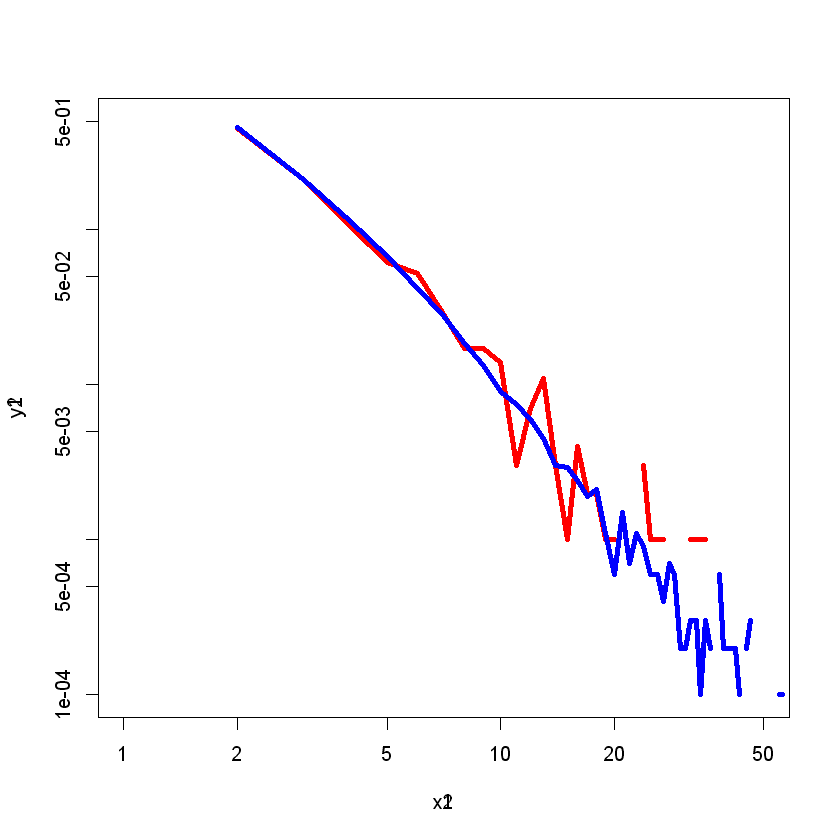

In [18]:
y1 = degree_distribution(g1)
x1 = (1:length(y1))-1
y2 = degree_distribution(g2)
x2 = (1:length(y2))-1
print(y1)
plot(x1,y1,log = 'xy', type='l', xlim=c(1,50), ylim=c(0.0001, 0.5), col='red',lwd = 4)
par(new = TRUE)
plot(x2,y2,log = 'xy', type='l', xlim=c(1,50), ylim=c(0.0001, 0.5), col='blue',lwd = 4)

In [19]:
x = log10(x1[y1>0])
y = log10(y1[y1>0])
lm(y~x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     0.3595      -2.3520  


In [20]:
x = log10(x2[y2>0])
y = log10(y2[y2>0])
lm(y~x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     0.0543      -2.2098  



Call:
lm(formula = b ~ a)

Coefficients:
(Intercept)            a  
    -0.2528      -1.1807  



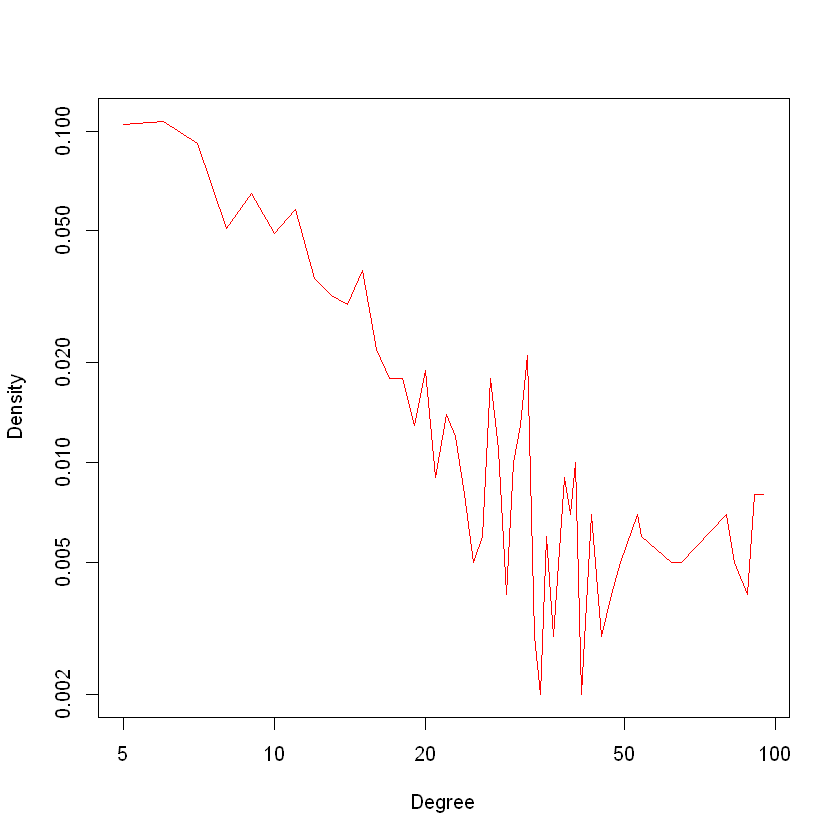

In [43]:
#for model n= 1000
n=1000
n_degree1 <- list()
for(i in 1:n){
    node_i = sample(n,1)
    nb_node_i = neighbors(g1,node_i)
    if (length(nb_node_i) == 1){
        node_j = nb_node_i
    }
    else{
        node_j = sample(nb_node_i,1)
    }
    n_degree1[[i]]<-degree(g1,node_j)
}

degt<-unlist(n_degree1)
dega<-table(degt)
deg<-dega/sum(dega)
y = as.numeric(deg)
x = names(deg)
plot(x,y,log = 'xy'，type='l',xlab='Degree',ylab = 'Density',col='red')
x = as.numeric(x)
a = log10(x)
b = log10(y)
print(lm(b~a))


Call:
lm(formula = b ~ a)

Coefficients:
(Intercept)            a  
    -0.3965      -1.2134  



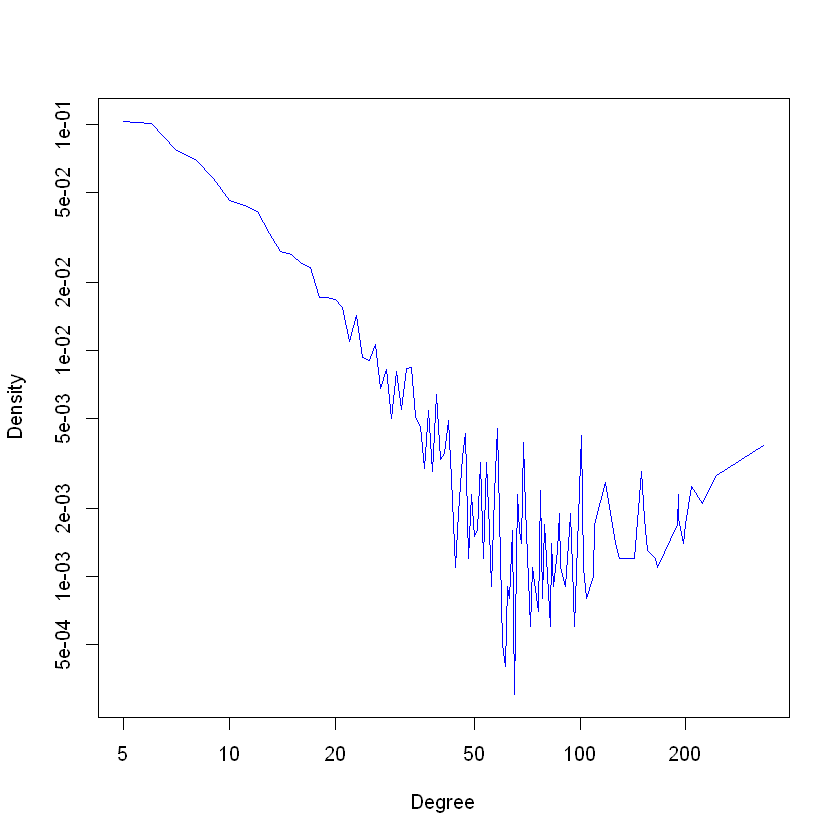

In [44]:
#for model n= 10000
n=10000
n_degree2 <- list()
for(i in 1:n){
    node_i = sample(n,1)
    nb_node_i = neighbors(g2,node_i)
    if (length(nb_node_i) == 1){
        node_j = nb_node_i
    }
    else{
        node_j = sample(nb_node_i,1)
    }
    n_degree2[[i]]<-degree(g2,node_j)
}
degt<-unlist(n_degree2)
dega<-table(degt)
deg<-dega/sum(dega)
y = as.numeric(deg)
x = names(deg)
plot(x,y,log = 'xy'，type='l',xlab='Degree',ylab = 'Density',col='blue')
x = as.numeric(x)
a = log10(x)
b = log10(y)
print(lm(b~a))

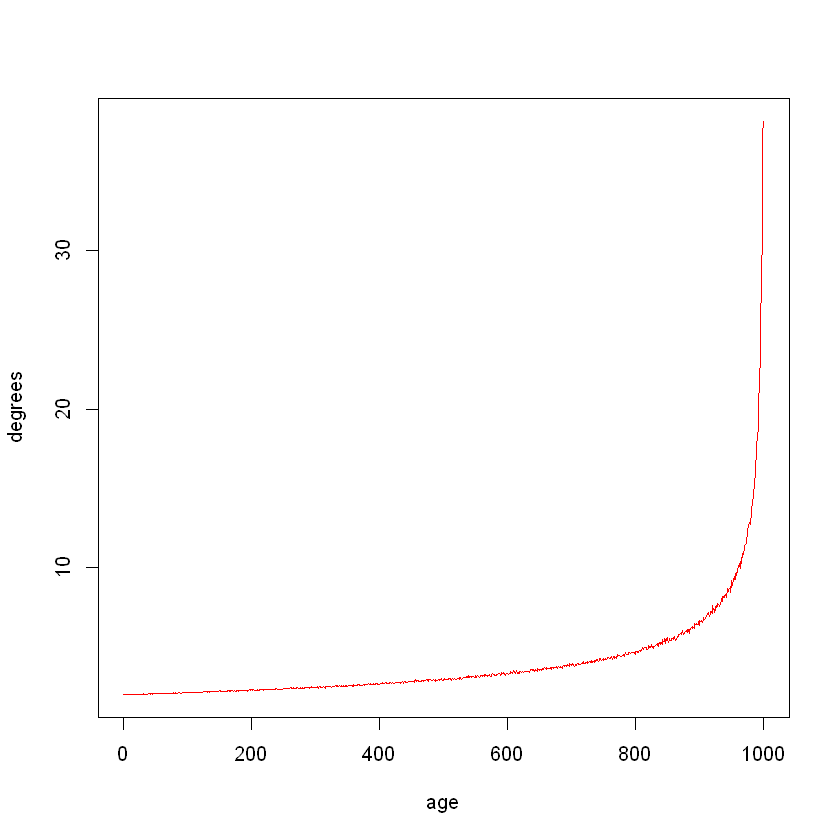

In [23]:
n = 1000

degrees <- array(0,1000)
for(i in 1:n){
    g<-sample_pa(n=n,m=m,directed=F)
    degrees<-degrees+degree(g)
}
degrees<-degrees/n

plot(x=1:n,y=rev(degrees),type='l',xlab='age',ylab = 'degrees',col='red')
    

# M=5

In [24]:
m=5
tmp_conc = zeros(1,100)
for(i in 1:100){
    g<-sample_pa(n=1000,m=m,directed=F)
    tmp_conc[i] <- is_connected(g)
}
mean(tmp_conc)

[1] 1

In [25]:
g1 <- sample_pa(n=1000,m=m,directed=F)


In [26]:
tmp_conc = zeros(1,100)
for(i in 1:100){
    g<-sample_pa(n=1000,m=m,directed=F)
    tmp_conc[i] <- is_connected(g)
}
mean(tmp_conc)

[1] 1

In [27]:
g1 <- sample_pa(n=1000,m=m,directed=F)
modularity(g1, cluster_fast_greedy(g1)$membership)

[1] 0.2785164

In [28]:
tmp_conc = zeros(1,100)
for(i in 1:100){
    g<-sample_pa(n=10000,m=m,directed=F)
    tmp_conc[i] <- is_connected(g)
}
mean(tmp_conc)

[1] 1

In [29]:
g2 <- sample_pa(n=10000,m=m,directed=F)
modularity(g2, cluster_fast_greedy(g2)$membership)

[1] 0.2782617

 [1] 0.000 0.000 0.000 0.000 0.000 0.262 0.179 0.125 0.066 0.066 0.048 0.039
[13] 0.028 0.026 0.017 0.020 0.015 0.009 0.012 0.008 0.007 0.004 0.008 0.003
[25] 0.004 0.002 0.003 0.006 0.003 0.001 0.004 0.004 0.005 0.001 0.002 0.002
[37] 0.001 0.000 0.003 0.002 0.001 0.001 0.000 0.001 0.000 0.001 0.000 0.001
[49] 0.000 0.001 0.000 0.000 0.000 0.001 0.001 0.000 0.000 0.000 0.000 0.000
[61] 0.000 0.000 0.001 0.000 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000
[73] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.001
[85] 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.001 0.000 0.000 0.000 0.001


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"47 y values <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"230 y values <= 0 omitted from logarithmic plot"

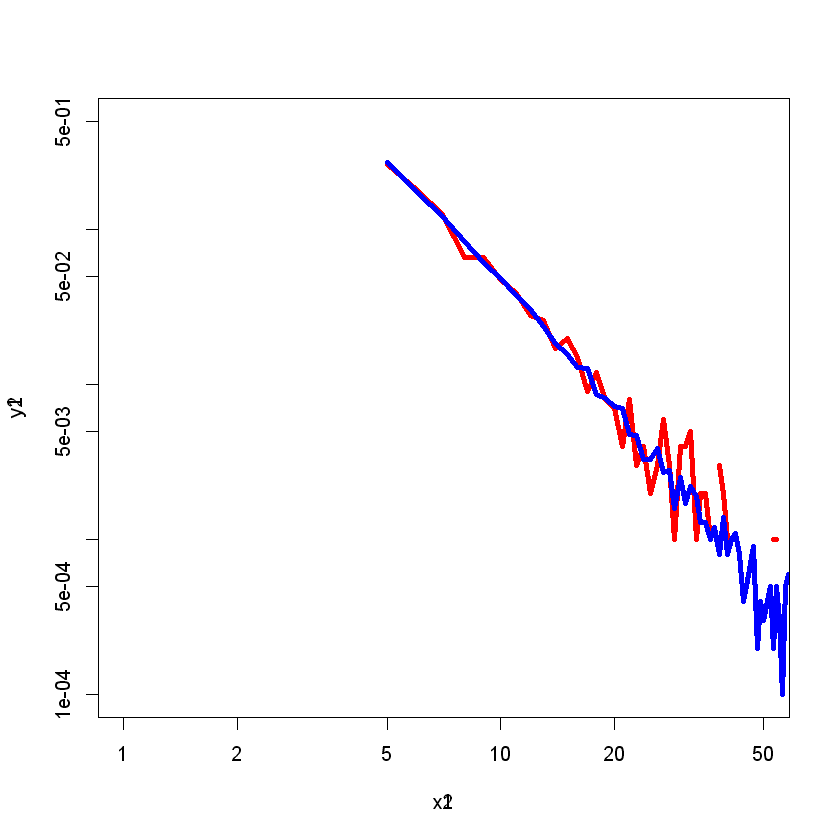

In [30]:
y1 = degree_distribution(g1)
x1 = (1:length(y1))-1
y2 = degree_distribution(g2)
x2 = (1:length(y2))-1
print(y1)
plot(x1,y1,log = 'xy', type='l', xlim=c(1,50), ylim=c(0.0001, 0.5), col='red',lwd = 4)
par(new = TRUE)
plot(x2,y2,log = 'xy', type='l', xlim=c(1,50), ylim=c(0.0001, 0.5), col='blue',lwd = 4)

In [31]:
x = log10(x1[y1>0])
y = log10(y1[y1>0])
lm(y~x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     0.6003      -2.0643  


In [32]:
x = log10(x2[y2>0])
y = log10(y2[y2>0])
lm(y~x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     0.5613      -2.1928  



Call:
lm(formula = b ~ a)

Coefficients:
(Intercept)            a  
    -0.3492      -1.1029  



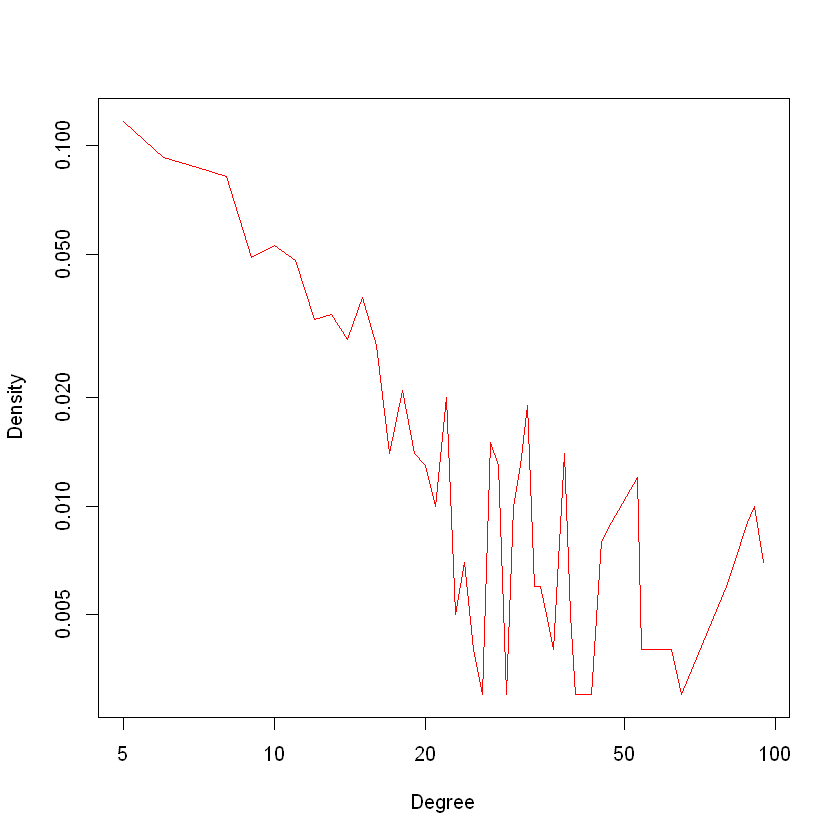

In [45]:
#for model n= 1000
n=1000
n_degree1 <- list()
for(i in 1:n){
    node_i = sample(n,1)
    nb_node_i = neighbors(g1,node_i)
    if (length(nb_node_i) == 1){
        node_j = nb_node_i
    }
    else{
        node_j = sample(nb_node_i,1)
    }
    n_degree1[[i]]<-degree(g1,node_j)
}

degt<-unlist(n_degree1)
dega<-table(degt)
deg<-dega/sum(dega)
y = as.numeric(deg)
x = names(deg)
plot(x,y,log = 'xy'，type='l',xlab='Degree',ylab = 'Density',col='red')
x = as.numeric(x)
a = log10(x)
b = log10(y)
print(lm(b~a))


Call:
lm(formula = b ~ a)

Coefficients:
(Intercept)            a  
    -0.3852      -1.2255  



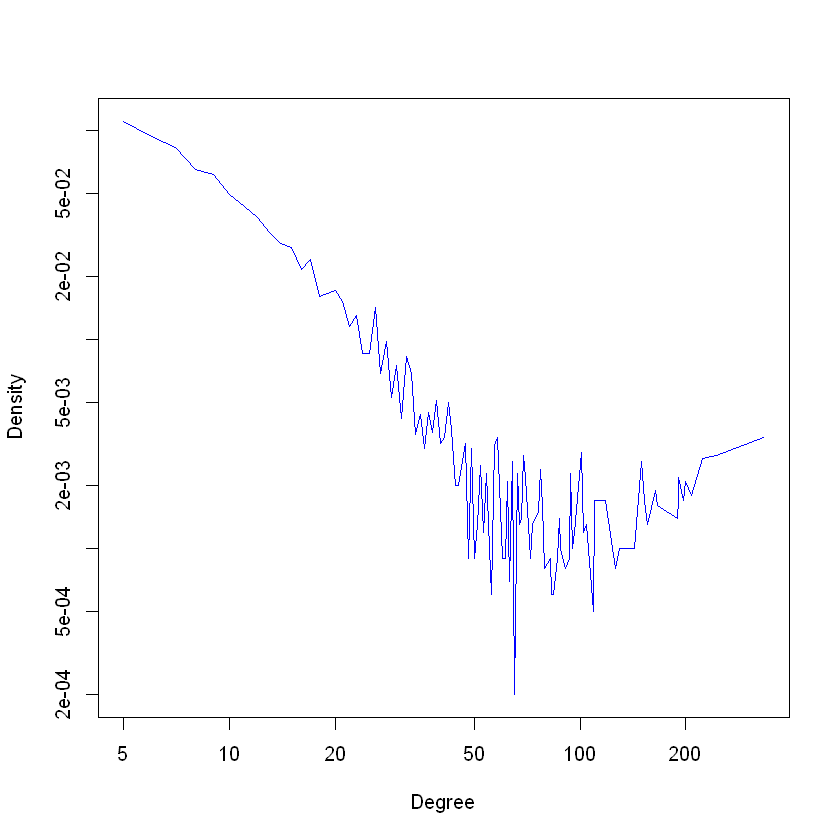

In [46]:
#for model n= 10000
n=10000
n_degree2 <- list()
for(i in 1:n){
    node_i = sample(n,1)
    nb_node_i = neighbors(g2,node_i)
    if (length(nb_node_i) == 1){
        node_j = nb_node_i
    }
    else{
        node_j = sample(nb_node_i,1)
    }
    n_degree2[[i]]<-degree(g2,node_j)
}
degt<-unlist(n_degree2)
dega<-table(degt)
deg<-dega/sum(dega)
y = as.numeric(deg)
x = names(deg)
plot(x,y,log = 'xy'，type='l',xlab='Degree',ylab = 'Density',col='blue')
x = as.numeric(x)
a = log10(x)
b = log10(y)
print(lm(b~a))

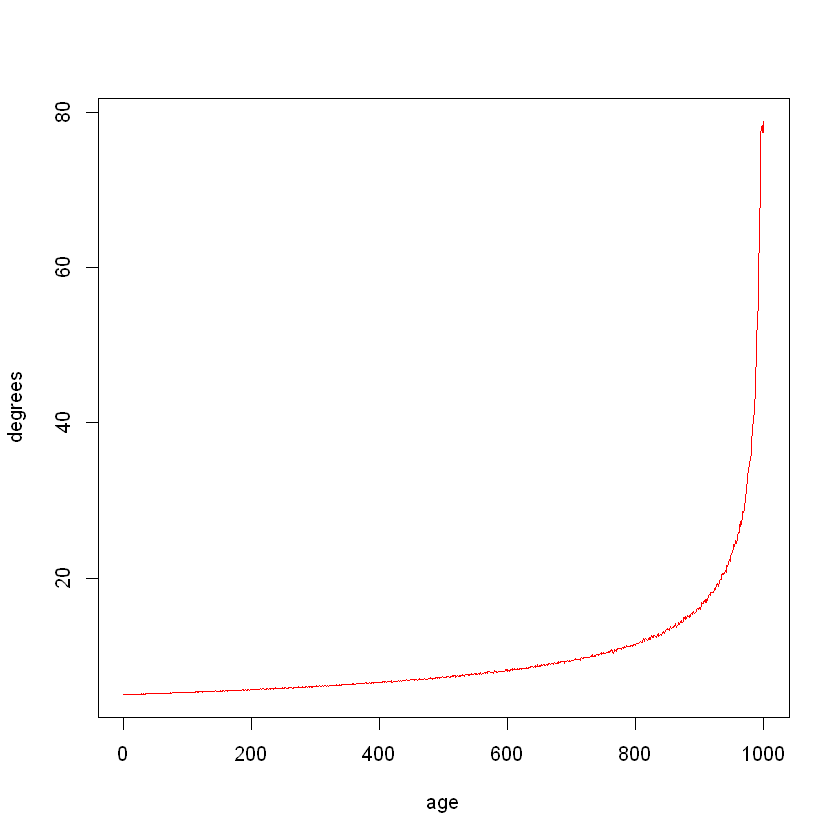

In [35]:
n = 1000

degrees <- array(0,1000)
for(i in 1:n){
    g<-sample_pa(n=n,m=m,directed=F)
    degrees<-degrees+degree(g)
}
degrees<-degrees/n

plot(x=1:n,y=rev(degrees),type='l',xlab='age',ylab = 'degrees',col='red')
    

# 1_2_h

[1] "original graph:"
[1] "Modularity is  0.934872810748689"
[1] "Number of community is  32"


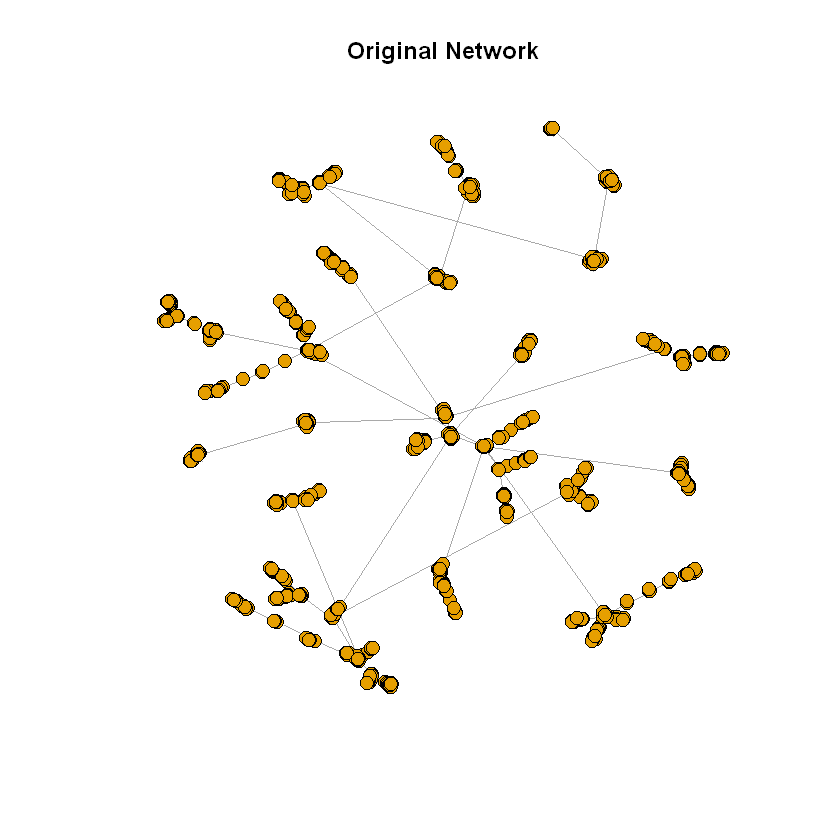

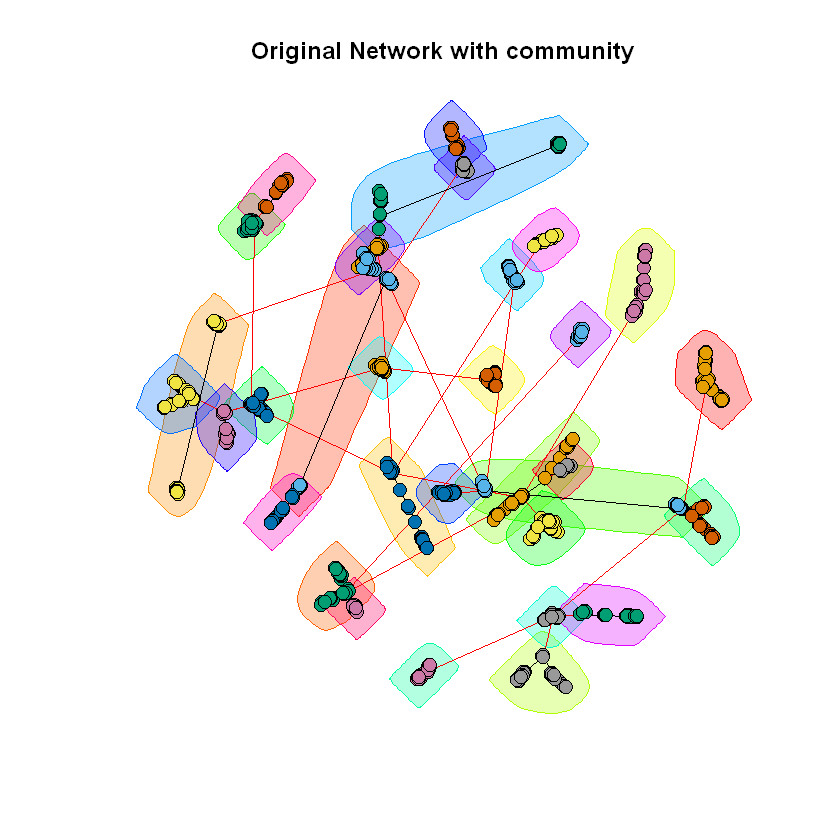

In [36]:
n=1000
m=1
g1<-sample_pa(n=n,m=m,directed=F)
degree1 <- degree(g1)
g_com <- cluster_fast_greedy(g1)
g_md <- modularity(g_com)
com_size<-length(g_com)
print('original graph:')
print(paste("Modularity is ", g_md))

plot(g1,vertex.size=5,vertex.label=NA,main="Original Network")
print(paste("Number of community is ", com_size))
plot(g_com,g1,vertex.size=5,vertex.label=NA,main="Original Network with community")





[1] "seq generated graph:"
[1] "Modularity is  0.832033234435639"
[1] "Number of community is  149"


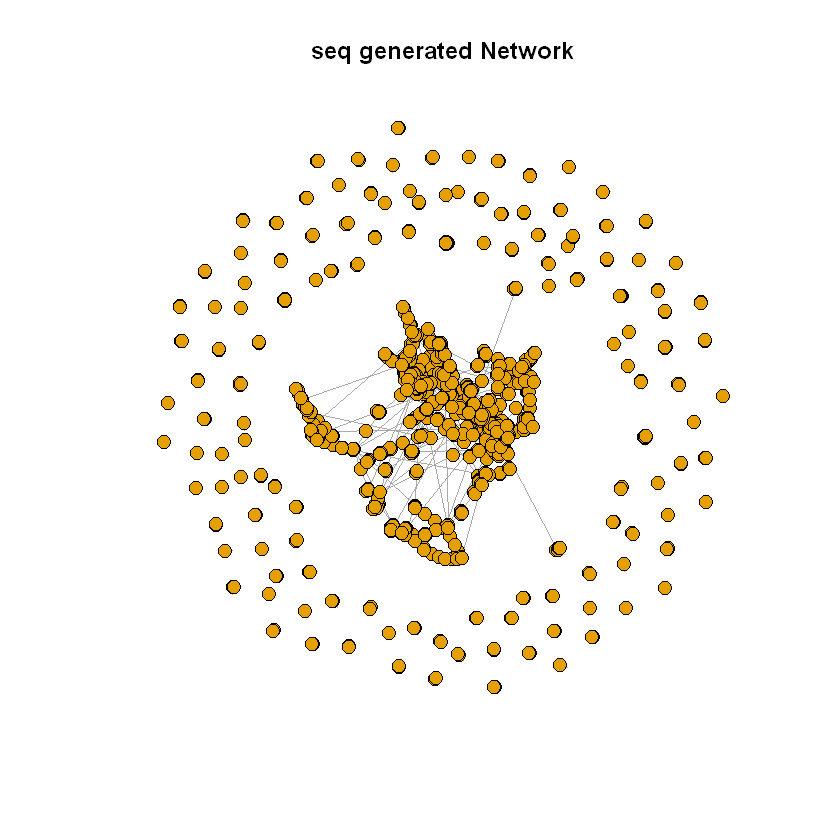

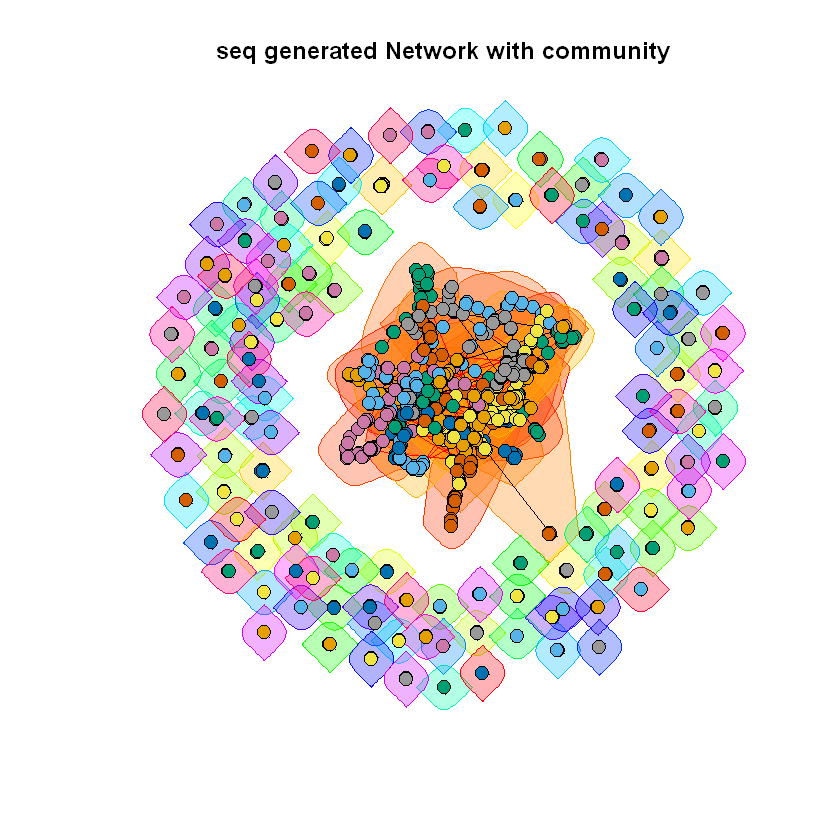

In [37]:
g2 <- sample_degseq(degree1,method="simple.no.multiple")
g_com <- cluster_fast_greedy(g2)
g_md <- modularity(g_com)
com_size<-length(g_com)
print("seq generated graph:")
print(paste("Modularity is ", g_md))
print(paste("Number of community is ", com_size))
plot(g2,vertex.size=5,vertex.label=NA,main="seq generated Network")
plot(g_com,g2,vertex.size=5,vertex.label=NA,main="seq generated Network with community")

[1] "seq generated graph:"
[1] "Modularity is  0.935587238890543"
[1] "Number of community is  31"


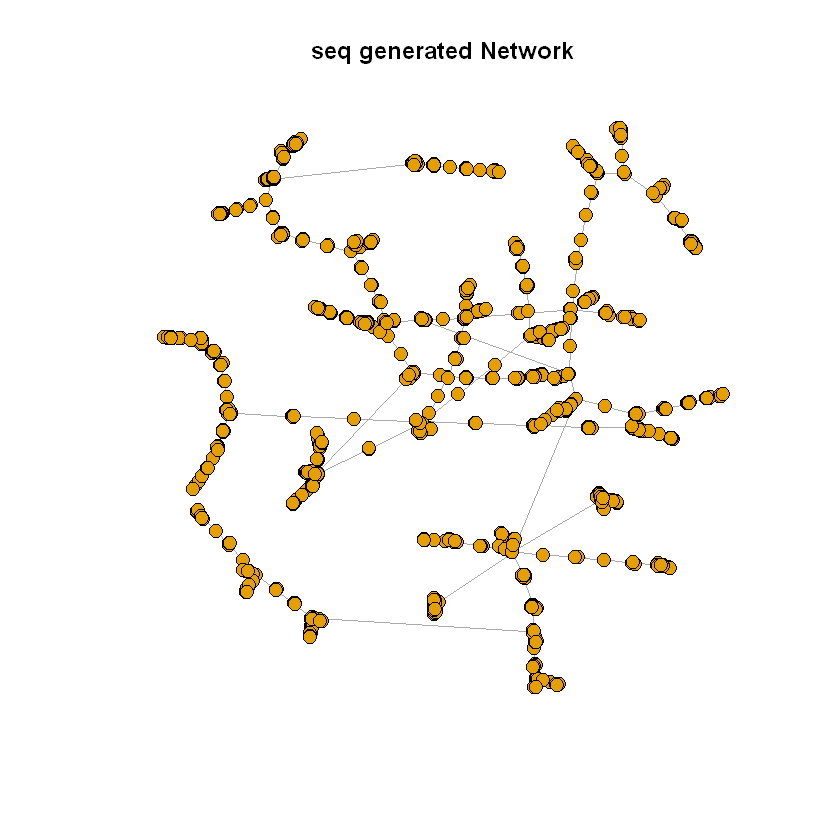

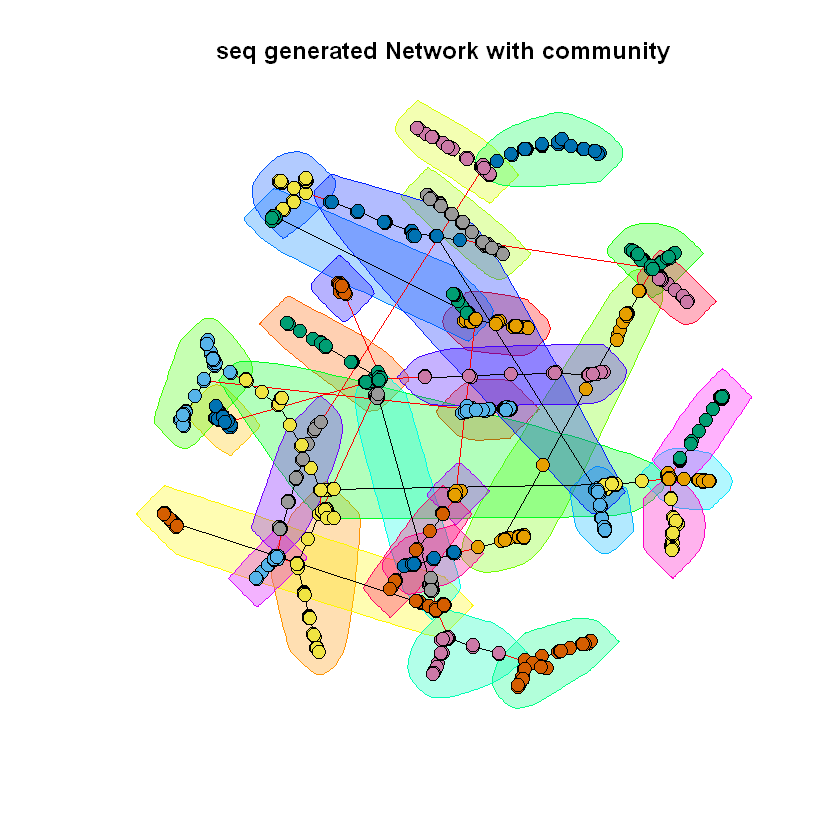

In [38]:
g2 <- sample_degseq(degree1,method="vl")
g_com <- cluster_fast_greedy(g2)
g_md <- modularity(g_com)
com_size<-length(g_com)
print("seq generated graph:")
print(paste("Modularity is ", g_md))
print(paste("Number of community is ", com_size))
plot(g2,vertex.size=5,vertex.label=NA,main="seq generated Network")
plot(g_com,g2,vertex.size=5,vertex.label=NA,main="seq generated Network with community")

# 1_3_a

 [1] 0.000 0.506 0.245 0.136 0.050 0.032 0.010 0.010 0.005 0.001 0.001 0.003
[13] 0.001


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 y value <= 0 omitted from logarithmic plot"

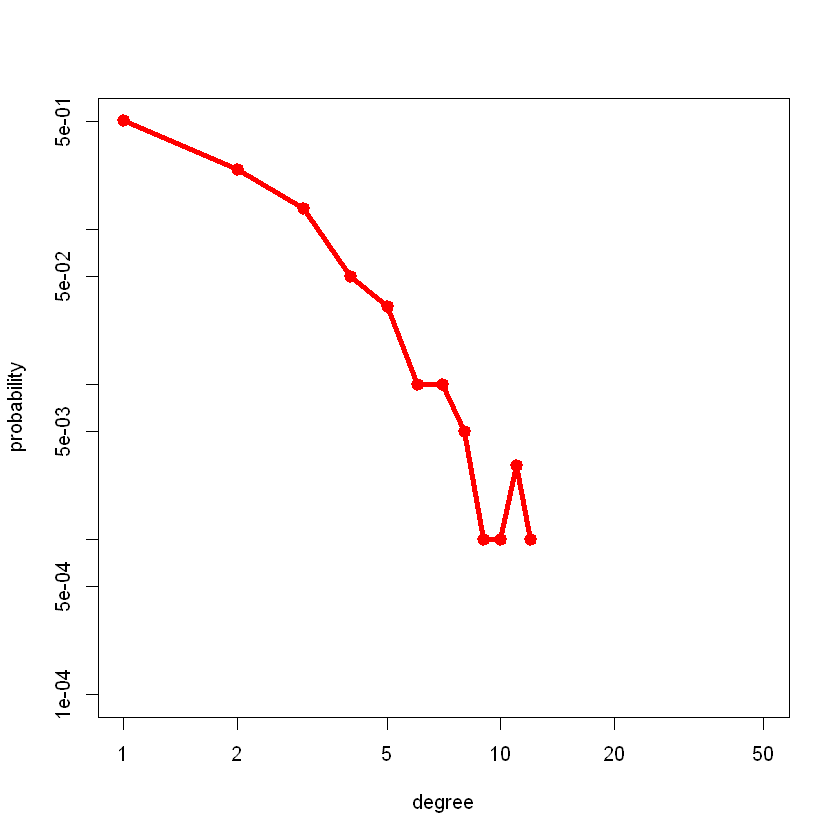

In [25]:
n=1000
m=1
alpha=1
beta=-1
a=c=d=1
b=0

g <- sample_pa_age(n=n,m=m,pa.exp=alpha,aging.exp=beta,zero.deg.appeal=a,zero.age.appeal=b,deg.coef
=c,age.coef=d,directed=FALSE)

degree_db<- degree.distribution(g)
y1 <- degree_db
x1 <- (1:length(y1))-1

print(y1)
plot(x1,y1,log = 'xy', type='o', xlim=c(1,50), ylim=c(0.0001, 0.5), col='red',lwd = 4,,xlab='degree',ylab = 'probability')


In [26]:
x = log(x1[y1>0])
y = log(y1[y1>0])
lm(y~x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     0.3115      -2.7668  


# 1_3_b

In [40]:
g_com <- cluster_fast_greedy(g)
com_size<-length(g_com)
g_md <- modularity(g_com)

[1] "Modularity is  0.935435435435441"
[1] "Number of community is  32"


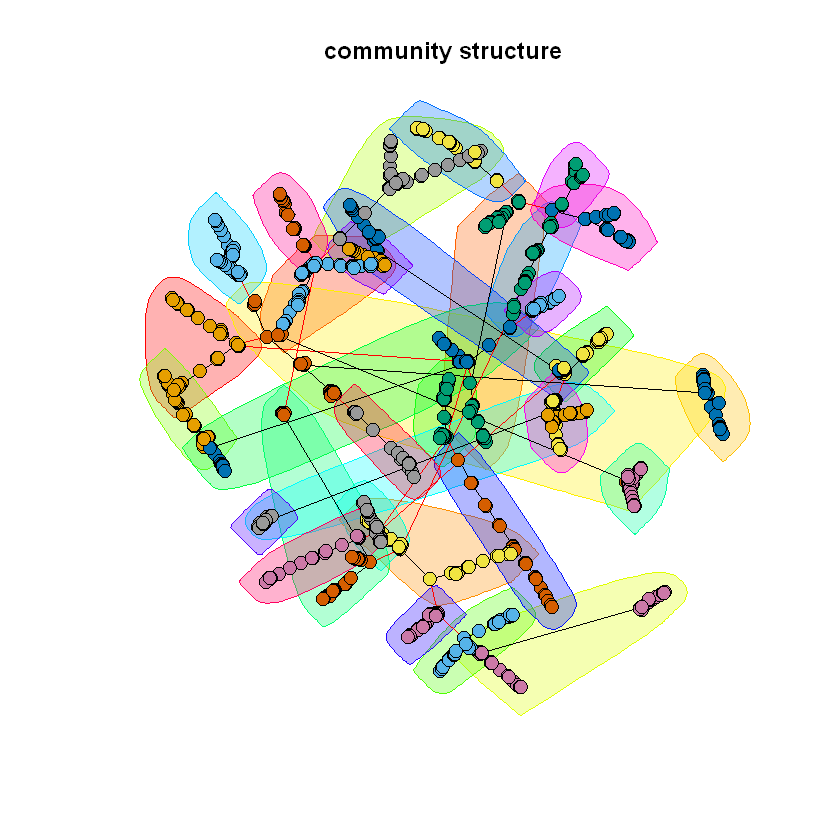

In [41]:
print(paste("Modularity is ", g_md))
print(paste("Number of community is ", com_size))
plot(g_com,g,vertex.size=5,vertex.label=NA,main="community structure")